# Introduction

<p style='text-align: justify;'> 
The interaction between commercial bank activity and financial markets has been a hot topic of discussion since the Global Financial Crisis (GFC). The risk-taking activities of commercial banks was brought under tight scrutiny after the GFC. The effect of bank activity on financial stability has become a large focus of Central Banks all around the world. The focus of this paper is to investigate the interaction between the balance sheets of the major banks in SA and the stock market. Specifically, the major aggregated components of these commercial banks are pooled together, to develop a model for their interaction with the index for the total value of South African shares. The data spans over the months starting from January 1993 up to April 2022 observed over monthly periods.

</p>

<p style='text-align: justify;'> 

    The data is gathered from two different sources. The `BA900` dataset includes all the balance sheet information for every registered bank in South Africa (SARB, 2022). This dataset, however, is not very easy to interpret. There are many issues that are difficult to solve systematically. The dataset includes a series of 13 tables that each contain either the Asset, Liability, or Equity items within the Balance Sheets of each bank. There are roughly 10 "total" columns that represent the major components in the balance sheets. For each of these items, there is a range of different decomposition into smaller items. For example, the `Total Deposits` item is decomposed into `Total deposits denominated in Rands` and its alternative in foreign currency. Alternatively, `Total Deposits` is also decomposed into its short-term, medium-term, and long-term components. Therefore, a decision to use either the total, the denomination, or the term structure for this item within the model is necessary. This type of problem is not consistent within the entire dataset. Different types of decomposition exist for each of the `total` columns without a simple way to filter for each component. For this reason, the paper continues by systematically filtering the dataset to exclude everything but the total items within the dataset.
    
    The total value for monthly share prices is obtained from FRED (2022).
    
</p>

# Setup (Only for Replication)

## Check Python version

In [2]:
from platform import  python_version

In [3]:
python_version()

'3.10.5'

## Install/Download necessary packages

In [4]:
import sys

In [5]:
# # Uncomment these if any packages are not installed in your current jupyter env 
# # Installing a pip package in the current kernel
# # Pandas also installs the numpy package
# !{sys.executable} -m pip install pandas  
# !{sys.executable} -m pip install requests
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install featuretools
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install jupyterlab-citation-manager

In [6]:
# import the required packages (more imported in the model section)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import datetime as dt
import featuretools as ft
from featuretools.selection import selection
from IPython.core.interactiveshell import InteractiveShell 
from IPython.display import Image  
import inspect
from functools import reduce

In [7]:
# import warnings
# warnings.filterwarnings('ignore')

## Functions

In [8]:
def view_files():
    path = os.getcwd()
    path = f"{path}\data"
    return(os.listdir(path))

def check_file(file):
    #grab the file path from which to import the dataset
    path = os.getcwd()
    path = f"{path}\data"
    path = f"{path}\{file}"
    return(path)

def import_data(path):
    # read the csv file as a dataframe and remove unnecessary columns
    df = pd.read_csv(filepath_or_buffer=path)
    return(df)

# Importing and Preprocessing the Data

In [9]:
view_files()

['absa2.csv',
 'absa_jup.csv',
 'AllShares_growth.csv',
 'banks_data.csv',
 'capitec.csv',
 'feature_imp_select.csv',
 'fnb.csv',
 'household_financial_assets-currency_and_deposits.csv',
 'investec.csv',
 'investment_Qgrowth.csv',
 'inv_by_assets_intellectual.csv',
 'nedbank.csv',
 'share_prices.csv',
 'standard_bank.csv']

## Importing and Cleaning

In [10]:
check_file("absa.csv")

'C:\\GitHub\\DS_PROJ\\data\\absa.csv'

In [11]:
absa = import_data(check_file("absa2.csv"))
absa.head(1)

,Bank,Unit,Table,Time series code,D_M_1993M01: 1993M01,D_M_1993M02: 1993M02,D_M_1993M03: 1993M03,D_M_1993M04: 1993M04,D_M_1993M05: 1993M05,D_M_1993M06: 1993M06,...,D_M_2021M07: 2021M07,D_M_2021M08: 2021M08,D_M_2021M09: 2021M09,D_M_2021M10: 2021M10,D_M_2021M11: 2021M11,D_M_2021M12: 2021M12,D_M_2022M01: 2022M01,D_M_2022M02: 2022M02,D_M_2022M03: 2022M03,D_M_2022M04: 2022M04
0,B_34118: Absa Bank Ltd,U_RT: R'000 (thousands),T_T01: Table 1: LIABILITIES AT MONTH-END,RBD-B_34118-T_T01-U_RT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data is not stored in the format typically useful for the pandas framework.

First, the unnecessary variables/indicators such as `Units` and `Time series code"` 

is be removed or transformed and the excessive variable naming trimmed.

In [12]:
def clean_names1(df, bank_prefix="B_34118: "):
    df = df.drop(["Unit", "Time series code"], axis="columns")
    
    # Remove ugly string labels of columns
    df.columns = df.columns.str.replace(pat="D_M_[0-9]{4}M[0-9]{2}:", repl="", regex=True)
    df["Bank"] = df["Bank"].str.replace(pat=bank_prefix, repl="", regex=True)
    df["Bank"] = df["Bank"].str.replace(pat = " ", repl = "_")
    return(df)
    

In [13]:
absa = clean_names1(absa)

In [14]:
absa.head(1)

,Bank,Table,1993M01,1993M02,1993M03,1993M04,1993M05,1993M06,1993M07,1993M08,...,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03,2022M04
0,Absa_Bank_Ltd,T_T01: Table 1: LIABILITIES AT MONTH-END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Below is a check to ensure that all the rows that have lable 

`T_T[0-9]{2}R[0-9]{3}:` or `T_T[0-9]{2}R[0-9]{3}_A:` do not

contain any observations and can therefore be removed

In [15]:
InteractiveShell.ast_node_interactivity = "all"

In [16]:
all(absa[absa["Table"].str.contains("T_T[0-9]{2}R[0-9]{3}:", 
                                    regex = True)].isna().sum(axis=1, 
                                                              skipna=False) == len(absa.columns) - 2);
all(absa[absa["Table"].str.contains("T_T[0-9]{2}R[0-9]{3}_A:", 
                                    regex = True)].isna().sum(axis=1, 
                                                              skipna=False) == len(absa.columns) - 2)

True

True

In [17]:
InteractiveShell.ast_node_interactivity = "last"

Now, we can remove the rows that contain the labels

mentioned above

In [18]:
def remove_empty(df):
    # Remove empty title rows
    df = df[~df["Table"].str.contains("T_T[0-9]{2}R[0-9]{3}:", regex = True)]
    df = df[~df["Table"].str.contains("T_T[0-9]{2}R[0-9]{3}_A:", regex = True)]
    
    return(df)

In [19]:
absa = remove_empty(absa)

In [20]:
absa.head(1)

,Bank,Table,1993M01,1993M02,1993M03,1993M04,1993M05,1993M06,1993M07,1993M08,...,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03,2022M04
0,Absa_Bank_Ltd,T_T01: Table 1: LIABILITIES AT MONTH-END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# absa.loc[absa["Table"].str.contains("T_T01R[0-9]{3}C[0-9]{2}: T01R[0-9]{3}[A]{0,1}C[0-9]{2}: ", 
#                                regex=True), :].iloc[:,1:3].set_index("Table").head(15)

absa.loc[absa["Table"].str.contains("T_T01R001|T_T01R002|T_T02R032", 
                               regex=True), :].iloc[:,1:3].set_index("Table")

,1993M01
Table,
T_T01R001C01: T01R001C01: DEPOSITS (total of items 2 and 32): Cheque (1),9588342.0
T_T01R001C02: T01R001C02: DEPOSITS (total of items 2 and 32): Savings (2),7800740.0
T_T01R001C03: T01R001C03: DEPOSITS (total of items 2 and 32): Up to 1 day (3),8946659.0
T_T01R001C04: T01R001C04: DEPOSITS (total of items 2 and 32): More than 1 day to 1 month (4),9417927.0
T_T01R001C05: T01R001C05: DEPOSITS (total of items 2 and 32): More than 1 month to 6 months (5),21301640.0
T_T01R001C06: T01R001C06: DEPOSITS (total of items 2 and 32): More than 6 months (6),8981624.0
T_T01R001C07: T01R001C07: DEPOSITS (total of items 2 and 32): TOTAL (7),66036932.0
T_T01R001C08: T01R001C08: DEPOSITS (total of items 2 and 32): NCDs/PNs i (included in col. 7) (8),NaN
"T_T01R002C01: T01R002C01: DEPOSITS DENOMINATED IN RAND (total of items 3, 6, 12, 13 and 29): Cheque (1)",9588342.0


In [22]:
66034650.0 + 2282.0 == 66036932.0

# i.e. what we have above is
r_001 = absa.loc[absa["Table"].str.contains("DEPOSITS [(]total of items 2 and 32[)]: TOTAL [(]7[)]"),
        :].iloc[:,3]
r_002 = absa.loc[absa["Table"].str.contains("DEPOSITS DENOMINATED IN RAND [(]total of items 3, 6, 12, 13 and 29[)]: TOTAL [(]7[)]"),
          :].iloc[:,3]
r_032 = absa.loc[absa["Table"].str.contains("DEPOSITS DENOMINATED IN FOREIGN CURRENCY [(]total of items 33 to 38[)]: TOTAL [(]7[)]"),
          :].iloc[:,3]
int(r_001) == int(r_002) + int(r_032)


True

And finally, we can remove the ugly naming

In [23]:
def clean_names2(df):
    # Label the different tables withing the df, i.e liablities, assets, etc.
    df["Table"] = df["Table"].str.replace("T_T0[1-2](R[0-9]{3,4})C[0-9]{2}: T0[1-2]R[0-9]{3}[A]{0,1}C[0-9]{2}: ", 
                                          regex = True, repl=r"L_T1-2_\1_")
    df["Table"] = df["Table"].str.replace("T_T0[3-4](R[0-9]{3,4})C[0-9]{2}: T0[3-4]R[0-9]{3}[A]{0,1}C[0-9]{2}: ", 
                                          regex = True, repl=r"L_T3-4_\1_")
    df["Table"] = df["Table"].str.replace("T_T0[5](R[0-9]{3,4})C[0-9]{2}: T0[5]R[0-9]{3}[A]{0,1}C[0-9]{2}: ", 
                                      regex = True, repl=r"E_T5_\1_")
    df["Table"] = df["Table"].str.replace("T_T0[6-9](R[0-9]{3,4})C[0-9]{2}: T0[6-9]R[0-9]{3}[A]{0,1}C[0-9]{2}: ", 
                                          regex = True, repl=r"A_T6-13_\1_")
    df["Table"] = df["Table"].str.replace("T_T1[0-3](R[0-9]{3,4})C[0-9]{2}: T1[0-3]R[0-9]{3}[A]{0,1}C[0-9]{2}: ", 
                                          regex = True, repl=r"A_T6-13_\1_")
    df["Table"] = df["Table"].str.replace(",", "")
    # remove bracket explanations
#     df["Table"] = df["Table"].str.replace("[(][0-9a-z\s,]{2,}[)][:] ", regex = True, repl="")
    return(df)

<div style="text-align: justify">
The lines below are only clear after completing the entire sequence of steps followed in this project and plotting the `Central bank money and gold`  variable over time. The total column for this feature is empty from around 2005 and we need to specifically impute the missing values from its subcategory. Similar issues are also present for the `Deposits, Loans, and Advances` and `Non-financial Assets`
</div>

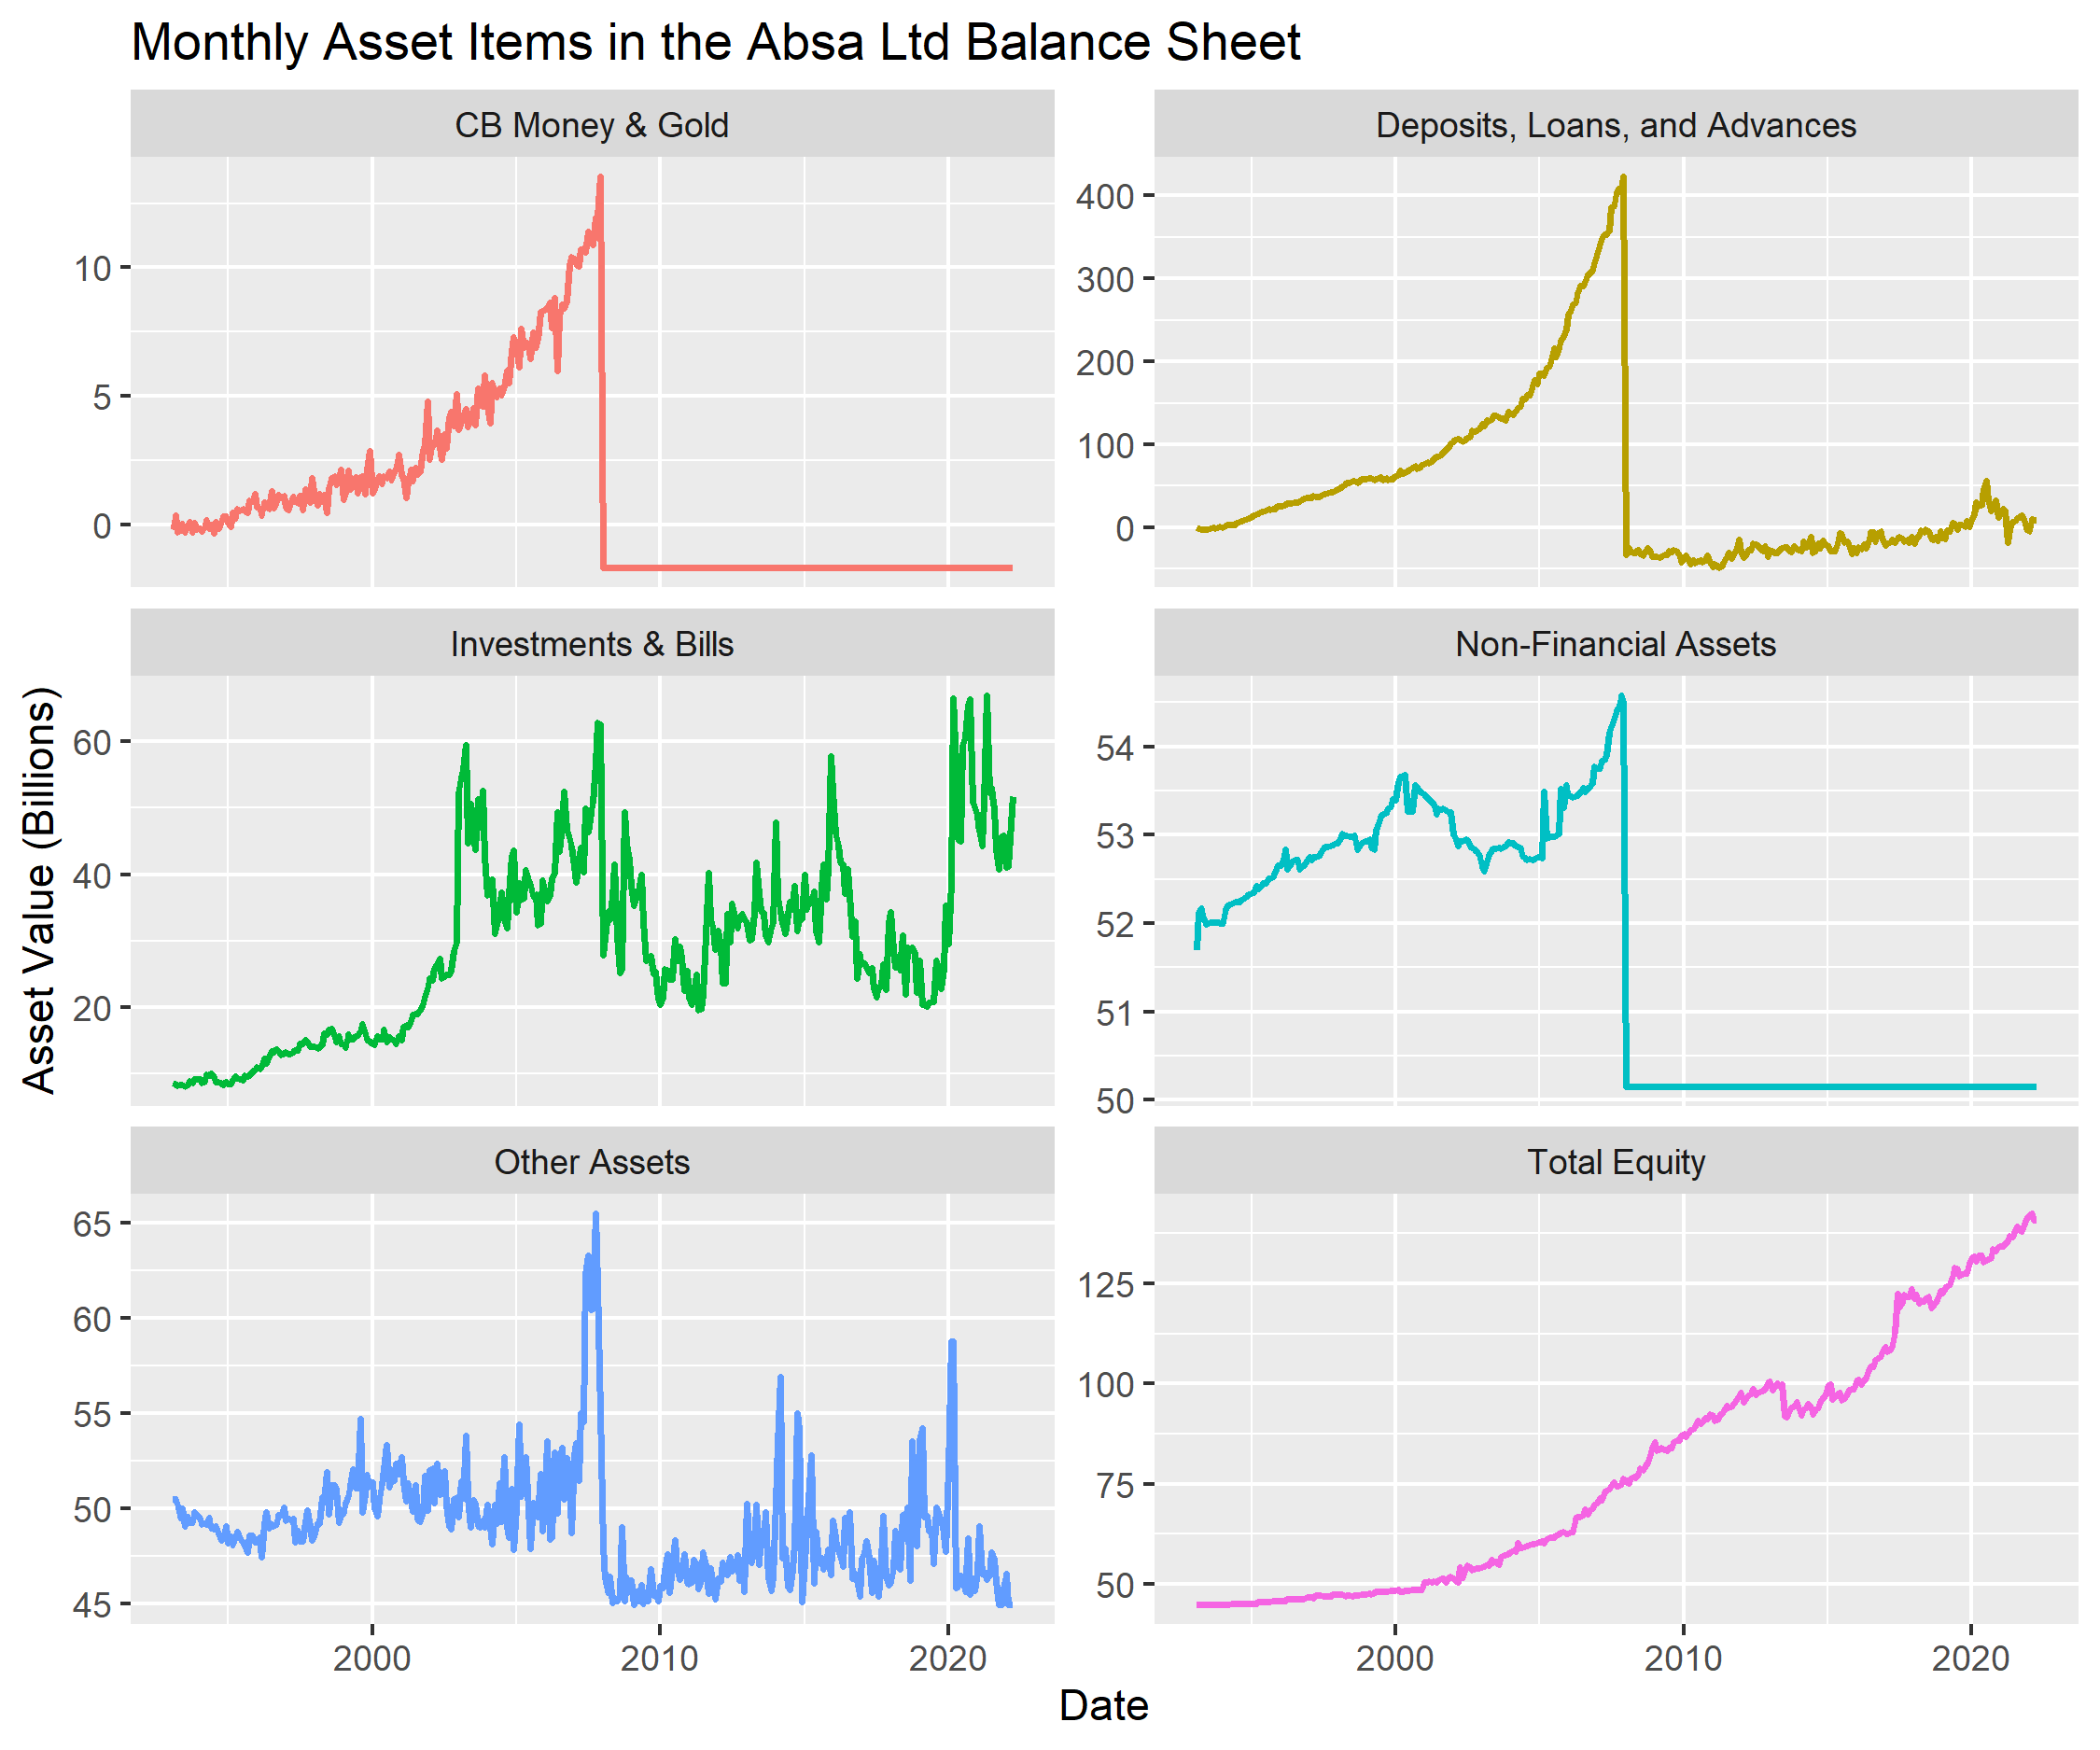

In [24]:
from IPython.display import Image
Image("./figures/missing_totals.png", width=700, height=700)

In [25]:
absa.loc[absa["Table"].str.contains("Central.{,3}Bank", regex=True, case=False),][["Table", 
                                                   " 2007M11", " 2007M12", " 2008M01", " 2008M02", " 2022M04"]]

,Table,2007M11,2007M12,2008M01,2008M02,2022M04
758,T_T06R103C18: T06R103C18: CENTRAL BANK MONEY A...,13645297.0,15190112.0,13758992.0,13315198.0,33454208.0
759,T_T06R103C19: T06R103C19: CENTRAL BANK MONEY A...,NaN,NaN,NaN,NaN,NaN
760,T_T06R103C21: T06R103C21: CENTRAL BANK MONEY A...,0.0,0.0,NaN,NaN,0.0
761,T_T06R103C22: T06R103C22: CENTRAL BANK MONEY A...,NaN,NaN,NaN,NaN,NaN
762,T_T06R103C24: T06R103C24: CENTRAL BANK MONEY A...,13645297.0,15190112.0,0.0,0.0,0.0
763,T_T06R103C25: T06R103C25: CENTRAL BANK MONEY A...,0.0,0.0,NaN,NaN,0.0


In [26]:
absa.loc[absa["Table"].str.contains("Deposits, loans", 
                                    regex=True, 
                                    case=False),]#[["Table", " 2007M11", " 2007M12", " 2008M01", " 2008M02"]]

,Bank,Table,1993M01,1993M02,1993M03,1993M04,1993M05,1993M06,1993M07,1993M08,...,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03,2022M04
807,Absa_Bank_Ltd,"T_T06R110C18: T06R110C18: DEPOSITS, LOANS AND ...",64047968.0,65947855.0,64696818.0,63307284.0,63139892.0,63178459.0,64254248.0,65044752.0,...,900001589.0,912977212.0,926291034.0,930239471.0,973512169.0,956047585.0,938001855.0,941540133.0,942356062.0,952401151.0
808,Absa_Bank_Ltd,"T_T06R110C19: T06R110C19: DEPOSITS, LOANS AND ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,Absa_Bank_Ltd,"T_T06R110C21: T06R110C21: DEPOSITS, LOANS AND ...",937381.0,838561.0,811696.0,504127.0,949588.0,814481.0,408669.0,369640.0,...,51067949.0,52016315.0,52100644.0,52745582.0,53468243.0,52749188.0,52977051.0,53516247.0,51851753.0,53561665.0
810,Absa_Bank_Ltd,"T_T06R110C22: T06R110C22: DEPOSITS, LOANS AND ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,Absa_Bank_Ltd,"T_T06R110C24: T06R110C24: DEPOSITS, LOANS AND ...",64985349.0,66786416.0,65508514.0,63811411.0,64089480.0,63992940.0,64662917.0,65414392.0,...,74529667.0,77663925.0,78899748.0,81178798.0,74540284.0,64701459.0,62134502.0,76409017.0,75906076.0,75427581.0
812,Absa_Bank_Ltd,"T_T06R110C25: T06R110C25: DEPOSITS, LOANS AND ...",NaN,NaN,NaN,51000.0,NaN,67000.0,76000.0,81000.0,...,57435201.0,60076132.0,59485984.0,58404757.0,65695050.0,51309794.0,48540893.0,59137706.0,58564677.0,58874042.0


In [27]:
absa.loc[absa["Table"].str.contains("NON-FINANCIAL", 
                                    regex=True),][["Table", 
                                                   " 2007M11", " 2007M12", " 2008M01", " 2008M02"]]

,Table,2007M11,2007M12,2008M01,2008M02
1948,T_T13R258C18: T13R258C18: NON-FINANCIAL ASSETS...,4425493.0,4360173.0,4346590.0,4354713.0
1949,T_T13R258C20: T13R258C20: NON-FINANCIAL ASSETS...,NaN,NaN,NaN,NaN
1950,T_T13R258C21: T13R258C21: NON-FINANCIAL ASSETS...,0.0,0.0,NaN,NaN
1951,T_T13R258C23: T13R258C23: NON-FINANCIAL ASSETS...,NaN,NaN,NaN,NaN
1952,T_T13R258C24: T13R258C24: NON-FINANCIAL ASSETS...,4425493.0,4360173.0,0.0,0.0
1953,T_T13R258C25: T13R258C25: NON-FINANCIAL ASSETS...,NaN,NaN,NaN,NaN


In [28]:
absa.loc[absa["Table"].str.contains("OTHER ASSETS", 
                                    regex=True),][["Table", 
                                                   " 2007M11", " 2007M12", " 2008M01", " 2008M02"]]

,Table,2007M11,2007M12,2008M01,2008M02
2011,T_T13R267C18: T13R267C18: OTHER ASSETS (total ...,16799115.0,10121892.0,19805087.0,13059691.0
2012,T_T13R267C20: T13R267C20: OTHER ASSETS (total ...,NaN,NaN,NaN,NaN
2013,T_T13R267C21: T13R267C21: OTHER ASSETS (total ...,0.0,0.0,NaN,NaN
2014,T_T13R267C23: T13R267C23: OTHER ASSETS (total ...,NaN,NaN,NaN,NaN
2015,T_T13R267C24: T13R267C24: OTHER ASSETS (total ...,16799115.0,10121892.0,3112576.0,1314520.0
2016,T_T13R267C25: T13R267C25: OTHER ASSETS (total ...,NaN,NaN,NaN,NaN


In [29]:
test1 = absa.loc[absa["Table"].str.contains("OTHER ASSETS", 
                                    regex=True),].loc[2011," 1993M01" : " 2007M12"].fillna(0)
test2 = absa.loc[absa["Table"].str.contains("OTHER ASSETS", 
                                    regex=True),].loc[2015," 1993M01" : " 2007M12"].fillna(0)
#sum(test1 == test2), len(test1)
test1[test1 != test2], test2[test1 != test2]

( 1994M04    4219413.0
 Name: 2011, dtype: float64,
  1994M04    4219944.0
 Name: 2015, dtype: float64)

In [30]:
def fill_totals(df):
    # CB money
    repl1 = df["Table"].str.contains("T_T06R103C24: T06R103C24:", regex=True, case=False)
    with1 = df["Table"].str.contains("T_T06R103C18: T06R103C18:", regex=True, case=False)

    df.loc[repl1,:] = df.loc[repl1,:].replace(list(df.loc[repl1,:].iloc[0,2:]), 1)
    df.loc[repl1, " 1993M01":] = df.loc[repl1, " 1993M01":].cumsum(axis=1)

    df.loc[repl1,:] = df.loc[repl1,:].replace(list(df.loc[repl1,:].iloc[0,2:]), 
                                                  list(df.loc[with1,:].iloc[0,2:]))
    # Deposits
    repl2 = df["Table"].str.contains("T_T06R110C24: T06R110C24:", regex=True, case=False)
    with2 = df["Table"].str.contains("T_T06R110C18: T06R110C18:", regex=True, case=False)
    joint1 = df.loc[with2,:].iloc[0,2:].add(df.loc[repl2,:].iloc[0,2:])[" 2008M01":]
    with2b = list(df.loc[repl2,:].iloc[0,2:][:" 2007M12"].append(joint1))

    df.loc[repl2,:] = df.loc[repl2,:].replace(list(df.loc[repl2,:].iloc[0,2:]), 
                                                  list(with2b))
    
    # NON-FINANCIAL ASSETS
    repl3 = df["Table"].str.contains("T_T13R258C24: T13R258C24:", regex=True, case=False)
    with3 = df["Table"].str.contains("T_T13R258C18: T13R258C18:", regex=True, case=False)
    
    df.loc[repl3,:] = df.loc[repl3,:].replace(list(df.loc[repl3,:].iloc[0,2:]), 1)
    df.loc[repl3, " 1993M01":] = df.loc[repl3, " 1993M01":].cumsum(axis=1)

    df.loc[repl3,:] = df.loc[repl3,:].replace(list(df.loc[repl3,:].iloc[0,2:]), 
                                            list(df.loc[with3,:].iloc[0,2:]))
    
    # OTHER ASSETS
    repl4 = df["Table"].str.contains("T_T13R267C24: T13R267C24:", regex=True, case=False)
    with4a = df["Table"].str.contains("T_T13R267C21: T13R267C21:", regex=True, case=False)
    with4b = df["Table"].str.contains("T_T13R267C18: T13R267C18:", regex=True, case=False)
    joint2 = df.loc[with4a,:].fillna(0).iloc[0,2:].add(df.loc[with4b,:].fillna(0).iloc[0,2:])

    df.loc[repl4,:] = df.loc[repl4,:].replace(list(df.loc[repl4,:].iloc[0,2:]), 
                                            list(joint2))
    
    return(df)

In [31]:
absa = fill_totals(absa)

C:\Users\gerar\AppData\Local\Temp\ipykernel_9792\3008019174.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  with2b = list(df.loc[repl2,:].iloc[0,2:][:" 2007M12"].append(joint1))


In [32]:
absa = clean_names2(absa)

In [33]:
absa.head(1)

,Bank,Table,1993M01,1993M02,1993M03,1993M04,1993M05,1993M06,1993M07,1993M08,...,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03,2022M04
0,Absa_Bank_Ltd,T_T01: Table 1: LIABILITIES AT MONTH-END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
list(absa["Table"])[:6]

['T_T01: Table 1: LIABILITIES AT MONTH-END',
 'L_T1-2_R001_DEPOSITS (total of items 2 and 32): Cheque (1)',
 'L_T1-2_R001_DEPOSITS (total of items 2 and 32): Savings (2)',
 'L_T1-2_R001_DEPOSITS (total of items 2 and 32): Up to 1 day (3)',
 'L_T1-2_R001_DEPOSITS (total of items 2 and 32): More than 1 day to 1 month (4)',
 'L_T1-2_R001_DEPOSITS (total of items 2 and 32): More than 1 month to 6 months (5)']

In [35]:
list(absa[absa["Table"].str.contains("total", case=False)]["Table"])[:6]

['L_T1-2_R001_DEPOSITS (total of items 2 and 32): Cheque (1)',
 'L_T1-2_R001_DEPOSITS (total of items 2 and 32): Savings (2)',
 'L_T1-2_R001_DEPOSITS (total of items 2 and 32): Up to 1 day (3)',
 'L_T1-2_R001_DEPOSITS (total of items 2 and 32): More than 1 day to 1 month (4)',
 'L_T1-2_R001_DEPOSITS (total of items 2 and 32): More than 1 month to 6 months (5)',
 'L_T1-2_R001_DEPOSITS (total of items 2 and 32): More than 6 months (6)']

So we want to exclude several types of columns. That is, 

Those not containing the uppercase label `TOTAL`

First, to make things easier, the data is split into the three

major components of the Balance Sheet. That is, liabilities, 
assets, and equity

The dataframe must frist be transposed to ensure
it is in the correct form for the model from the start

In [36]:
list(absa.loc[absa["Table"].str.contains("TOTAL"),:]["Table"])[:6]

['L_T1-2_R001_DEPOSITS (total of items 2 and 32): TOTAL (7)',
 'L_T1-2_R002_DEPOSITS DENOMINATED IN RAND (total of items 3 6 12 13 and 29): TOTAL (7)',
 'L_T1-2_R003_SA banksb (total of items 4 and 5): TOTAL (7)',
 'L_T1-2_R004_NCDs/PNsi: TOTAL (7)',
 'L_T1-2_R005_Other deposits: TOTAL (7)',
 'L_T1-2_R006_Central and provincial government sector depositsc (total of items 7 10 and 11): TOTAL (7)']

It is clear from the above that the columns containing enough

aggregated information are tagged with `(total of items ...)`

so this can be filtered

In [37]:
def filter_totals(df):
    df = df.loc[df["Table"].str.contains("TOTAL"),:]
    df = df.loc[df["Table"].str.contains("[(]total of items ", regex=True), :]
    dups = df["Table"].str.replace(".*(R[0-9]{3}).*", regex=True, repl=r"\1").duplicated()
    df = df.loc[~dups,:]
    return(df)

In [38]:
absa = filter_totals(absa)

In [39]:
InteractiveShell.ast_node_interactivity = "all"

In [40]:
absa.head(1)
absa.info()

,Bank,Table,1993M01,1993M02,1993M03,1993M04,1993M05,1993M06,1993M07,1993M08,...,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03,2022M04
8,Absa_Bank_Ltd,L_T1-2_R001_DEPOSITS (total of items 2 and 32)...,66036932.0,65948319.0,66446620.0,64813147.0,64317315.0,65148147.0,64450271.0,66006474.0,...,987428308.0,978982466.0,990882087.0,1.002621e+09,1.026975e+09,1.025364e+09,997923770.0,1.011085e+09,1.022591e+09,1.048495e+09


<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 8 to 2081
Columns: 354 entries, Bank to  2022M04
dtypes: float64(352), object(2)
memory usage: 185.8+ KB


In [41]:
InteractiveShell.ast_node_interactivity = "last"

In [42]:
def reformat(df):
    df = df.drop("Bank", axis=1)
    df = df.set_index("Table").T
    df.columns.name = None
    df.index.name = "Date"
    df.index = pd.to_datetime(df.index, format=" %YM%m")
    df.columns = df.columns.str.replace(pat=" ", repl="_")
    df.columns = df.columns.str.replace(pat="total_of_items", repl="tot")
    df = df.apply(pd.to_numeric)
    
    return(df)

In [43]:
absa = reformat(absa)

In [44]:
def liabilities(df):
    df = df.iloc[:,df.columns.str.startswith(("L_"))]
    return(df)

def equity(df):
    df = df.iloc[:,df.columns.str.startswith(("E_"))]
    return(df)

def assets(df):
    df = df.iloc[:,df.columns.str.startswith(("A_"))]
    return(df)

In [45]:
absa_l = liabilities(absa)
absa_e = equity(absa)
absa_a = assets(absa)

In [46]:
list(absa_l.iloc[:,
                absa_l.columns.str.contains("L_T[13]-[24]_R[0-9]{3}_[A-Z]{3,}")].columns[1:-1])

['L_T1-2_R002_DEPOSITS_DENOMINATED_IN_RAND_(tot_3_6_12_13_and_29):_TOTAL_(7)',
 'L_T1-2_R032_DEPOSITS_DENOMINATED_IN_FOREIGN_CURRENCY_(tot_33_to_38):_TOTAL_(7)',
 'L_T3-4_R041_OTHER_BORROWED_FUNDS_(tot_42_51_and_57):_TOTAL_(4)',
 'L_T3-4_R058_FOREIGN_CURRENCY_FUNDING_(tot_59_to_63_and_66):_TOTAL_(4)',
 'L_T3-4_R067_OTHER_LIABILITIES_TO_THE_PUBLIC_(tot_68_73_74_and_77):_TOTAL_(4)',
 'L_T3-4_R078_TOTAL_LIABILITIES_TO_THE_PUBLIC_(tot_1_41_58_and_67):_Short-term_(1)',
 'L_T3-4_R080_OTHER_LIABILITIES_(tot_81_85_86_90_91_and_94):_TOTAL_(4)']

In [47]:
list(absa_e.columns[:-2])

['E_T5_R096_TOTAL_EQUITY_(tot_97_and_101):_TOTAL_(1)']

In [48]:
absa_a.iloc[:,absa_a.columns.str.contains("A_T6-13_R[0-9]{3}_[A-Z-]{4,}")].columns[:-1]

Index(['A_T6-13_R103_CENTRAL_BANK_MONEY_AND_GOLD_(tot_104_to_106):_TOTAL_ASSETS_(Col_1_plus_col_3)_(5)',
       'A_T6-13_R110_DEPOSITS_LOANS_AND_ADVANCES_(tot_111_117_118_126_135_139_150_166_171_and_180_less_item_194):_TOTAL_ASSETS_(Col_1_plus_col_3)_(5)',
       'A_T6-13_R195_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_(tot_196_207_213_217_221_225_229_233_237_241_and_246_less_item_245):_TOTAL_ASSETS_(Col_1_plus_col_3)_(5)',
       'A_T6-13_R258_NON-FINANCIAL_ASSETS_(tot_259_and_264):_TOTAL_ASSETS_(Col_1_plus_col_3)_(5)',
       'A_T6-13_R267_OTHER_ASSETS_(tot_268_to_272_and_276):_TOTAL_ASSETS_(Col_1_plus_col_3)_(5)'],
      dtype='object')

The columns referring to `RXXX` indexes prior to its own

will be removed, and the the `tot_XXX` columns referred to in the 

brackets above will be used to include more information


In [49]:
def clean_liab(df):
    keep = list(df.iloc[:,
                            df.columns.str.contains("L_T[13]-[24]_R[0-9]{3}_[A-Z]{3,}")].columns[1:-1])
    del keep[-2]
    df = df[keep]
    df.columns = df.columns.str.replace("T[13]-[24]_R[0-9]{3}_", "", regex=True)
    df.columns = df.columns.str.replace("_[(].*[)]:", "", regex=True)
    df.columns = df.columns.str.replace("_[(][0-9][)]", "", regex=True)
    return(df)

def clean_assets(df):
    keep = list(df.iloc[:,
                            df.columns.str.contains("A_T6-13_R[0-9]{3}_[A-Z-]{4,}")].columns[:-1])
    df = df[keep]
    df.columns = df.columns.str.replace("T6-13_R[0-9]{3}_", "", regex=True)
    df.columns = df.columns.str.replace("_[(].*[)]:", "", regex=True)
    df.columns = df.columns.str.replace("_[(][0-9][)]", "", regex=True)
    df.columns = df.columns.str.replace("_[(].*[)]", "", regex=True)
    return(df)

def clean_equity(df):
    keep = list(df.columns[:-2])
    df = df[keep]
    df.columns = df.columns.str.replace("T5_R[0-9]{3}_", "", regex=True)
    df.columns = df.columns.str.replace("_[(].*[)]:", "", regex=True)
    df.columns = df.columns.str.replace("_[(][0-9][)]", "", regex=True)
    return(df)

In [50]:
absa_l = clean_liab(absa_l)
absa_e = clean_equity(absa_e)
absa_a = clean_assets(absa_a)

In [51]:
def join_diff(liab, ass, eq, bank="ABSA"):
    df = pd.concat([liab, ass, eq], axis = 1)
#     df = df.replace(0, 1)
#     df = df.fillna(1)
    df = df.fillna(0)
#     df = np.log(df)
    df = df.diff()
    df = df.iloc[1:,:]
    df.insert(0, "Bank", bank)
    return(df)

In [52]:
absa = join_diff(absa_l, absa_a, absa_e)

In [53]:
check_file("absa2.csv")

'C:\\GitHub\\DS_PROJ\\data\\absa2.csv'

In [54]:
# Call the following to see a clear picture of the sequence of 
# steps to clean each of the banks' datasets.
[ f for f in globals().values() if inspect.isfunction(f) ]

[<function platform.python_version()>,
 <function __main__.view_files()>,
 <function __main__.check_file(file)>,
 <function __main__.import_data(path)>,
 <function __main__.clean_names1(df, bank_prefix='B_34118: ')>,
 <function __main__.remove_empty(df)>,
 <function __main__.clean_names2(df)>,
 <function __main__.fill_totals(df)>,
 <function __main__.filter_totals(df)>,
 <function __main__.reformat(df)>,
 <function __main__.liabilities(df)>,
 <function __main__.equity(df)>,
 <function __main__.assets(df)>,
 <function __main__.clean_liab(df)>,
 <function __main__.clean_assets(df)>,
 <function __main__.clean_equity(df)>,
 <function __main__.join_diff(liab, ass, eq, bank='ABSA')>]

In [55]:
view_files()

['absa2.csv',
 'absa_jup.csv',
 'AllShares_growth.csv',
 'banks_data.csv',
 'capitec.csv',
 'feature_imp_select.csv',
 'fnb.csv',
 'household_financial_assets-currency_and_deposits.csv',
 'investec.csv',
 'investment_Qgrowth.csv',
 'inv_by_assets_intellectual.csv',
 'nedbank.csv',
 'share_prices.csv',
 'standard_bank.csv']

In [56]:
check_file("standard_bank.csv")

'C:\\GitHub\\DS_PROJ\\data\\standard_bank.csv'

In [57]:
absa.to_csv("C:/GitHub/DS_PROJ/data/absa_jup.csv")

In [58]:
standard_bank = reformat(filter_totals(clean_names2(fill_totals(
    remove_empty(clean_names1(import_data(check_file("standard_bank.csv")), 
                                                                     bank_prefix="B_416061: "))))))
standard_bank
l_std = clean_liab(liabilities(standard_bank))
e_std = clean_equity(equity(standard_bank))
a_std = clean_assets(assets(standard_bank))

standard_bank = join_diff(l_std, e_std, a_std, bank="STANDARD_BANK")
standard_bank.head(1)

C:\Users\gerar\AppData\Local\Temp\ipykernel_9792\3008019174.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  with2b = list(df.loc[repl2,:].iloc[0,2:][:" 2007M12"].append(joint1))


,Bank,L_DEPOSITS_DENOMINATED_IN_RAND_TOTAL,L_DEPOSITS_DENOMINATED_IN_FOREIGN_CURRENCY_TOTAL,L_OTHER_BORROWED_FUNDS_TOTAL,L_FOREIGN_CURRENCY_FUNDING_TOTAL,L_OTHER_LIABILITIES_TO_THE_PUBLIC_TOTAL,L_OTHER_LIABILITIES_TOTAL,E_TOTAL_EQUITY_TOTAL,A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,A_OTHER_ASSETS_TOTAL_ASSETS
Date,,,,,,,,,,,,,
1993-02-01,STANDARD_BANK,-420910.0,-3967.0,-314590.0,-58478.0,113171.0,87232.0,152636.0,-89264.0,-899615.0,173511.0,-394.0,160439.0


In [59]:
fnb = reformat(filter_totals(clean_names2(fill_totals(
    remove_empty(clean_names1(import_data(check_file("fnb.csv")), 
                                        bank_prefix=""))))))
fnb
l = clean_liab(liabilities(fnb))
e = clean_equity(equity(fnb))
a = clean_assets(assets(fnb))

fnb = join_diff(l, e, a, bank="FNB")
fnb.head(1)

C:\Users\gerar\AppData\Local\Temp\ipykernel_9792\3008019174.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  with2b = list(df.loc[repl2,:].iloc[0,2:][:" 2007M12"].append(joint1))


,Bank,L_DEPOSITS_DENOMINATED_IN_RAND_TOTAL,L_DEPOSITS_DENOMINATED_IN_FOREIGN_CURRENCY_TOTAL,L_OTHER_BORROWED_FUNDS_TOTAL,L_FOREIGN_CURRENCY_FUNDING_TOTAL,L_OTHER_LIABILITIES_TO_THE_PUBLIC_TOTAL,L_OTHER_LIABILITIES_TOTAL,E_TOTAL_EQUITY_TOTAL,A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,A_OTHER_ASSETS_TOTAL_ASSETS
Date,,,,,,,,,,,,,
1993-02-01,FNB,1325346.0,128151.0,27282.0,-252496.0,-1150666.0,-105941.0,239.0,-104879.0,315014.0,-185054.0,37124.0,-130543.0


In [60]:
nedbank = reformat(filter_totals(clean_names2(fill_totals(
    remove_empty(clean_names1(import_data(check_file("nedbank.csv")), 
                                                                     bank_prefix=""))))))
nedbank
l = clean_liab(liabilities(nedbank))
e = clean_equity(equity(nedbank))
a = clean_assets(assets(nedbank))

nedbank = join_diff(l, e, a, bank="NEDBANK")
nedbank.head(1)

C:\Users\gerar\AppData\Local\Temp\ipykernel_9792\3008019174.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  with2b = list(df.loc[repl2,:].iloc[0,2:][:" 2007M12"].append(joint1))


,Bank,L_DEPOSITS_DENOMINATED_IN_RAND_TOTAL,L_DEPOSITS_DENOMINATED_IN_FOREIGN_CURRENCY_TOTAL,L_OTHER_BORROWED_FUNDS_TOTAL,L_FOREIGN_CURRENCY_FUNDING_TOTAL,L_OTHER_LIABILITIES_TO_THE_PUBLIC_TOTAL,L_OTHER_LIABILITIES_TOTAL,E_TOTAL_EQUITY_TOTAL,A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,A_OTHER_ASSETS_TOTAL_ASSETS
Date,,,,,,,,,,,,,
1993-02-01,NEDBANK,-353276.0,-59594.0,-38339.0,-21189.0,73316.0,24800.0,-21486.0,51383.0,222317.0,-491901.0,43588.0,-196910.0


In [61]:
investec = reformat(filter_totals(clean_names2(fill_totals(
    remove_empty(clean_names1(import_data(check_file("investec.csv")), 
                                                                     bank_prefix=""))))))
investec
l = clean_liab(liabilities(investec))
e = clean_equity(equity(investec))
a = clean_assets(assets(investec))

investec = join_diff(l, e, a, bank="INVESTEC")
investec.head(1)

C:\Users\gerar\AppData\Local\Temp\ipykernel_9792\3008019174.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  with2b = list(df.loc[repl2,:].iloc[0,2:][:" 2007M12"].append(joint1))


,Bank,L_DEPOSITS_DENOMINATED_IN_RAND_TOTAL,L_DEPOSITS_DENOMINATED_IN_FOREIGN_CURRENCY_TOTAL,L_OTHER_BORROWED_FUNDS_TOTAL,L_FOREIGN_CURRENCY_FUNDING_TOTAL,L_OTHER_LIABILITIES_TO_THE_PUBLIC_TOTAL,L_OTHER_LIABILITIES_TOTAL,E_TOTAL_EQUITY_TOTAL,A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,A_OTHER_ASSETS_TOTAL_ASSETS
Date,,,,,,,,,,,,,
1993-02-01,INVESTEC,96785.0,0.0,4125.0,-877.0,3866.0,0.0,5918.0,-926.0,129179.0,-4823.0,853.0,-2350.0


In [62]:
capitec = reformat(filter_totals(clean_names2(fill_totals(
    remove_empty(clean_names1(import_data(check_file("capitec.csv")), 
                                                                     bank_prefix=""))))))
capitec
l = clean_liab(liabilities(capitec))
e = clean_equity(equity(capitec))
a = clean_assets(assets(capitec))

capitec = join_diff(l, e, a, bank="CAPITEC")
capitec.head(1)

C:\Users\gerar\AppData\Local\Temp\ipykernel_9792\3008019174.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  with2b = list(df.loc[repl2,:].iloc[0,2:][:" 2007M12"].append(joint1))


,Bank,L_DEPOSITS_DENOMINATED_IN_RAND_TOTAL,L_DEPOSITS_DENOMINATED_IN_FOREIGN_CURRENCY_TOTAL,L_OTHER_BORROWED_FUNDS_TOTAL,L_FOREIGN_CURRENCY_FUNDING_TOTAL,L_OTHER_LIABILITIES_TO_THE_PUBLIC_TOTAL,L_OTHER_LIABILITIES_TOTAL,E_TOTAL_EQUITY_TOTAL,A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,A_OTHER_ASSETS_TOTAL_ASSETS
Date,,,,,,,,,,,,,
1993-02-01,CAPITEC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Aggregating the Banks Together

In [63]:
def join_banks(df1, df2, df3, df4, df5, df6):
    df = reduce(lambda a, b: a.add(b, fill_value=0), [df1, df2, df3, df4, df5, df6])
    df = df.drop("Bank", axis=1)
    return(df)

In [64]:
banks = join_banks(absa, standard_bank, nedbank, fnb, capitec, investec)

In [65]:
banks.head(1)

,A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,A_OTHER_ASSETS_TOTAL_ASSETS,E_TOTAL_EQUITY_TOTAL,L_DEPOSITS_DENOMINATED_IN_FOREIGN_CURRENCY_TOTAL,L_DEPOSITS_DENOMINATED_IN_RAND_TOTAL,L_FOREIGN_CURRENCY_FUNDING_TOTAL,L_OTHER_BORROWED_FUNDS_TOTAL,L_OTHER_LIABILITIES_TOTAL,L_OTHER_LIABILITIES_TO_THE_PUBLIC_TOTAL
Date,,,,,,,,,,,,
1993-02-01,-327647.0,1567962.0,-629455.0,83391.0,143264.0,137307.0,64119.0,559803.0,-236352.0,1071988.0,367124.0,-687740.0


In [66]:
banks.to_csv("./data/banks_data.csv")

# Shares

In [67]:
shares = pd.read_csv("./data/share_prices.csv")
shares.head(1)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,ZAF,SHPRICE,TOT,IDX2015,M,1960-01,0.367696,NaN


In [68]:
def wrangle_shares(df):
    df = shares[["TIME", "Value"]]
    df = df.set_index("TIME")
    df.index = pd.to_datetime(df.index, format="%Y-%m")
    df = df.diff()
    df = df.loc["1993-02-01":"2022-04-01"]
    return(df)

In [69]:
shares = wrangle_shares(shares)

In [70]:
InteractiveShell.ast_node_interactivity = "all"

In [71]:
shares.head(1)
banks.head(1)

,Value
TIME,
1993-02-01,0.161575


,A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,A_OTHER_ASSETS_TOTAL_ASSETS,E_TOTAL_EQUITY_TOTAL,L_DEPOSITS_DENOMINATED_IN_FOREIGN_CURRENCY_TOTAL,L_DEPOSITS_DENOMINATED_IN_RAND_TOTAL,L_FOREIGN_CURRENCY_FUNDING_TOTAL,L_OTHER_BORROWED_FUNDS_TOTAL,L_OTHER_LIABILITIES_TOTAL,L_OTHER_LIABILITIES_TO_THE_PUBLIC_TOTAL
Date,,,,,,,,,,,,
1993-02-01,-327647.0,1567962.0,-629455.0,83391.0,143264.0,137307.0,64119.0,559803.0,-236352.0,1071988.0,367124.0,-687740.0


In [72]:
shares.describe()
banks.describe()

,Value
count,351.000000
mean,0.383069
std,2.417176
min,-21.702500
25%,-0.475430
50%,0.378450
75%,1.437770
max,7.425600


,A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,A_OTHER_ASSETS_TOTAL_ASSETS,E_TOTAL_EQUITY_TOTAL,L_DEPOSITS_DENOMINATED_IN_FOREIGN_CURRENCY_TOTAL,L_DEPOSITS_DENOMINATED_IN_RAND_TOTAL,L_FOREIGN_CURRENCY_FUNDING_TOTAL,L_OTHER_BORROWED_FUNDS_TOTAL,L_OTHER_LIABILITIES_TOTAL,L_OTHER_LIABILITIES_TO_THE_PUBLIC_TOTAL
count,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02
mean,4.522916e+05,1.216169e+07,7.703279e+05,2.380714e+05,2.597255e+05,1.251278e+06,6.527960e+05,1.210421e+07,2.923482e+05,5.795071e+05,1.438985e+06,1.168575e+06
std,4.388543e+06,2.469413e+07,1.943875e+07,7.220150e+05,6.272783e+06,2.918968e+06,5.364917e+06,2.252057e+07,8.627608e+06,8.963922e+06,2.793051e+07,4.931576e+06
min,-3.286008e+07,-6.296183e+07,-1.915898e+08,-3.097381e+06,-2.992281e+07,-1.038261e+07,-2.428134e+07,-8.141831e+07,-4.037649e+07,-3.680302e+07,-6.614101e+07,-1.316763e+07
25%,-9.751130e+05,1.065199e+06,-5.354569e+06,-1.842232e+04,-2.282324e+06,2.306700e+04,-9.084105e+05,4.027476e+05,-2.348286e+06,-2.627997e+06,-9.501097e+06,-8.986175e+05
50%,3.522990e+05,6.731999e+06,4.978690e+05,9.156500e+04,1.432640e+05,7.013292e+05,1.480770e+05,6.593286e+06,1.650020e+05,2.978050e+05,2.458900e+04,4.196943e+05
75%,1.695969e+06,2.046875e+07,4.663307e+06,4.029994e+05,2.710220e+06,2.390600e+06,1.976295e+06,2.406895e+07,3.190577e+06,3.645654e+06,6.042989e+06,2.304931e+06
max,3.266915e+07,1.617355e+08,1.112526e+08,9.287935e+06,2.450820e+07,1.501661e+07,3.276245e+07,1.102514e+08,4.316232e+07,3.045689e+07,2.447002e+08,5.659738e+07


In [73]:
InteractiveShell.ast_node_interactivity = "last"

# Correlation Analysis

In [74]:
share_corr = shares.join(banks).corr()[["Value"]]
plot_names = share_corr[share_corr["Value"]<0.10].index.to_list()
share_corr.sort_values("Value", key=abs, ascending=False)

,Value
Value,1.000000
L_OTHER_LIABILITIES_TOTAL,-0.366697
A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,-0.300625
L_FOREIGN_CURRENCY_FUNDING_TOTAL,-0.224657
A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,-0.204616
A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,-0.201991
L_OTHER_BORROWED_FUNDS_TOTAL,-0.170269
A_OTHER_ASSETS_TOTAL_ASSETS,0.155158
L_DEPOSITS_DENOMINATED_IN_FOREIGN_CURRENCY_TOTAL,-0.119003
L_DEPOSITS_DENOMINATED_IN_RAND_TOTAL,-0.114247


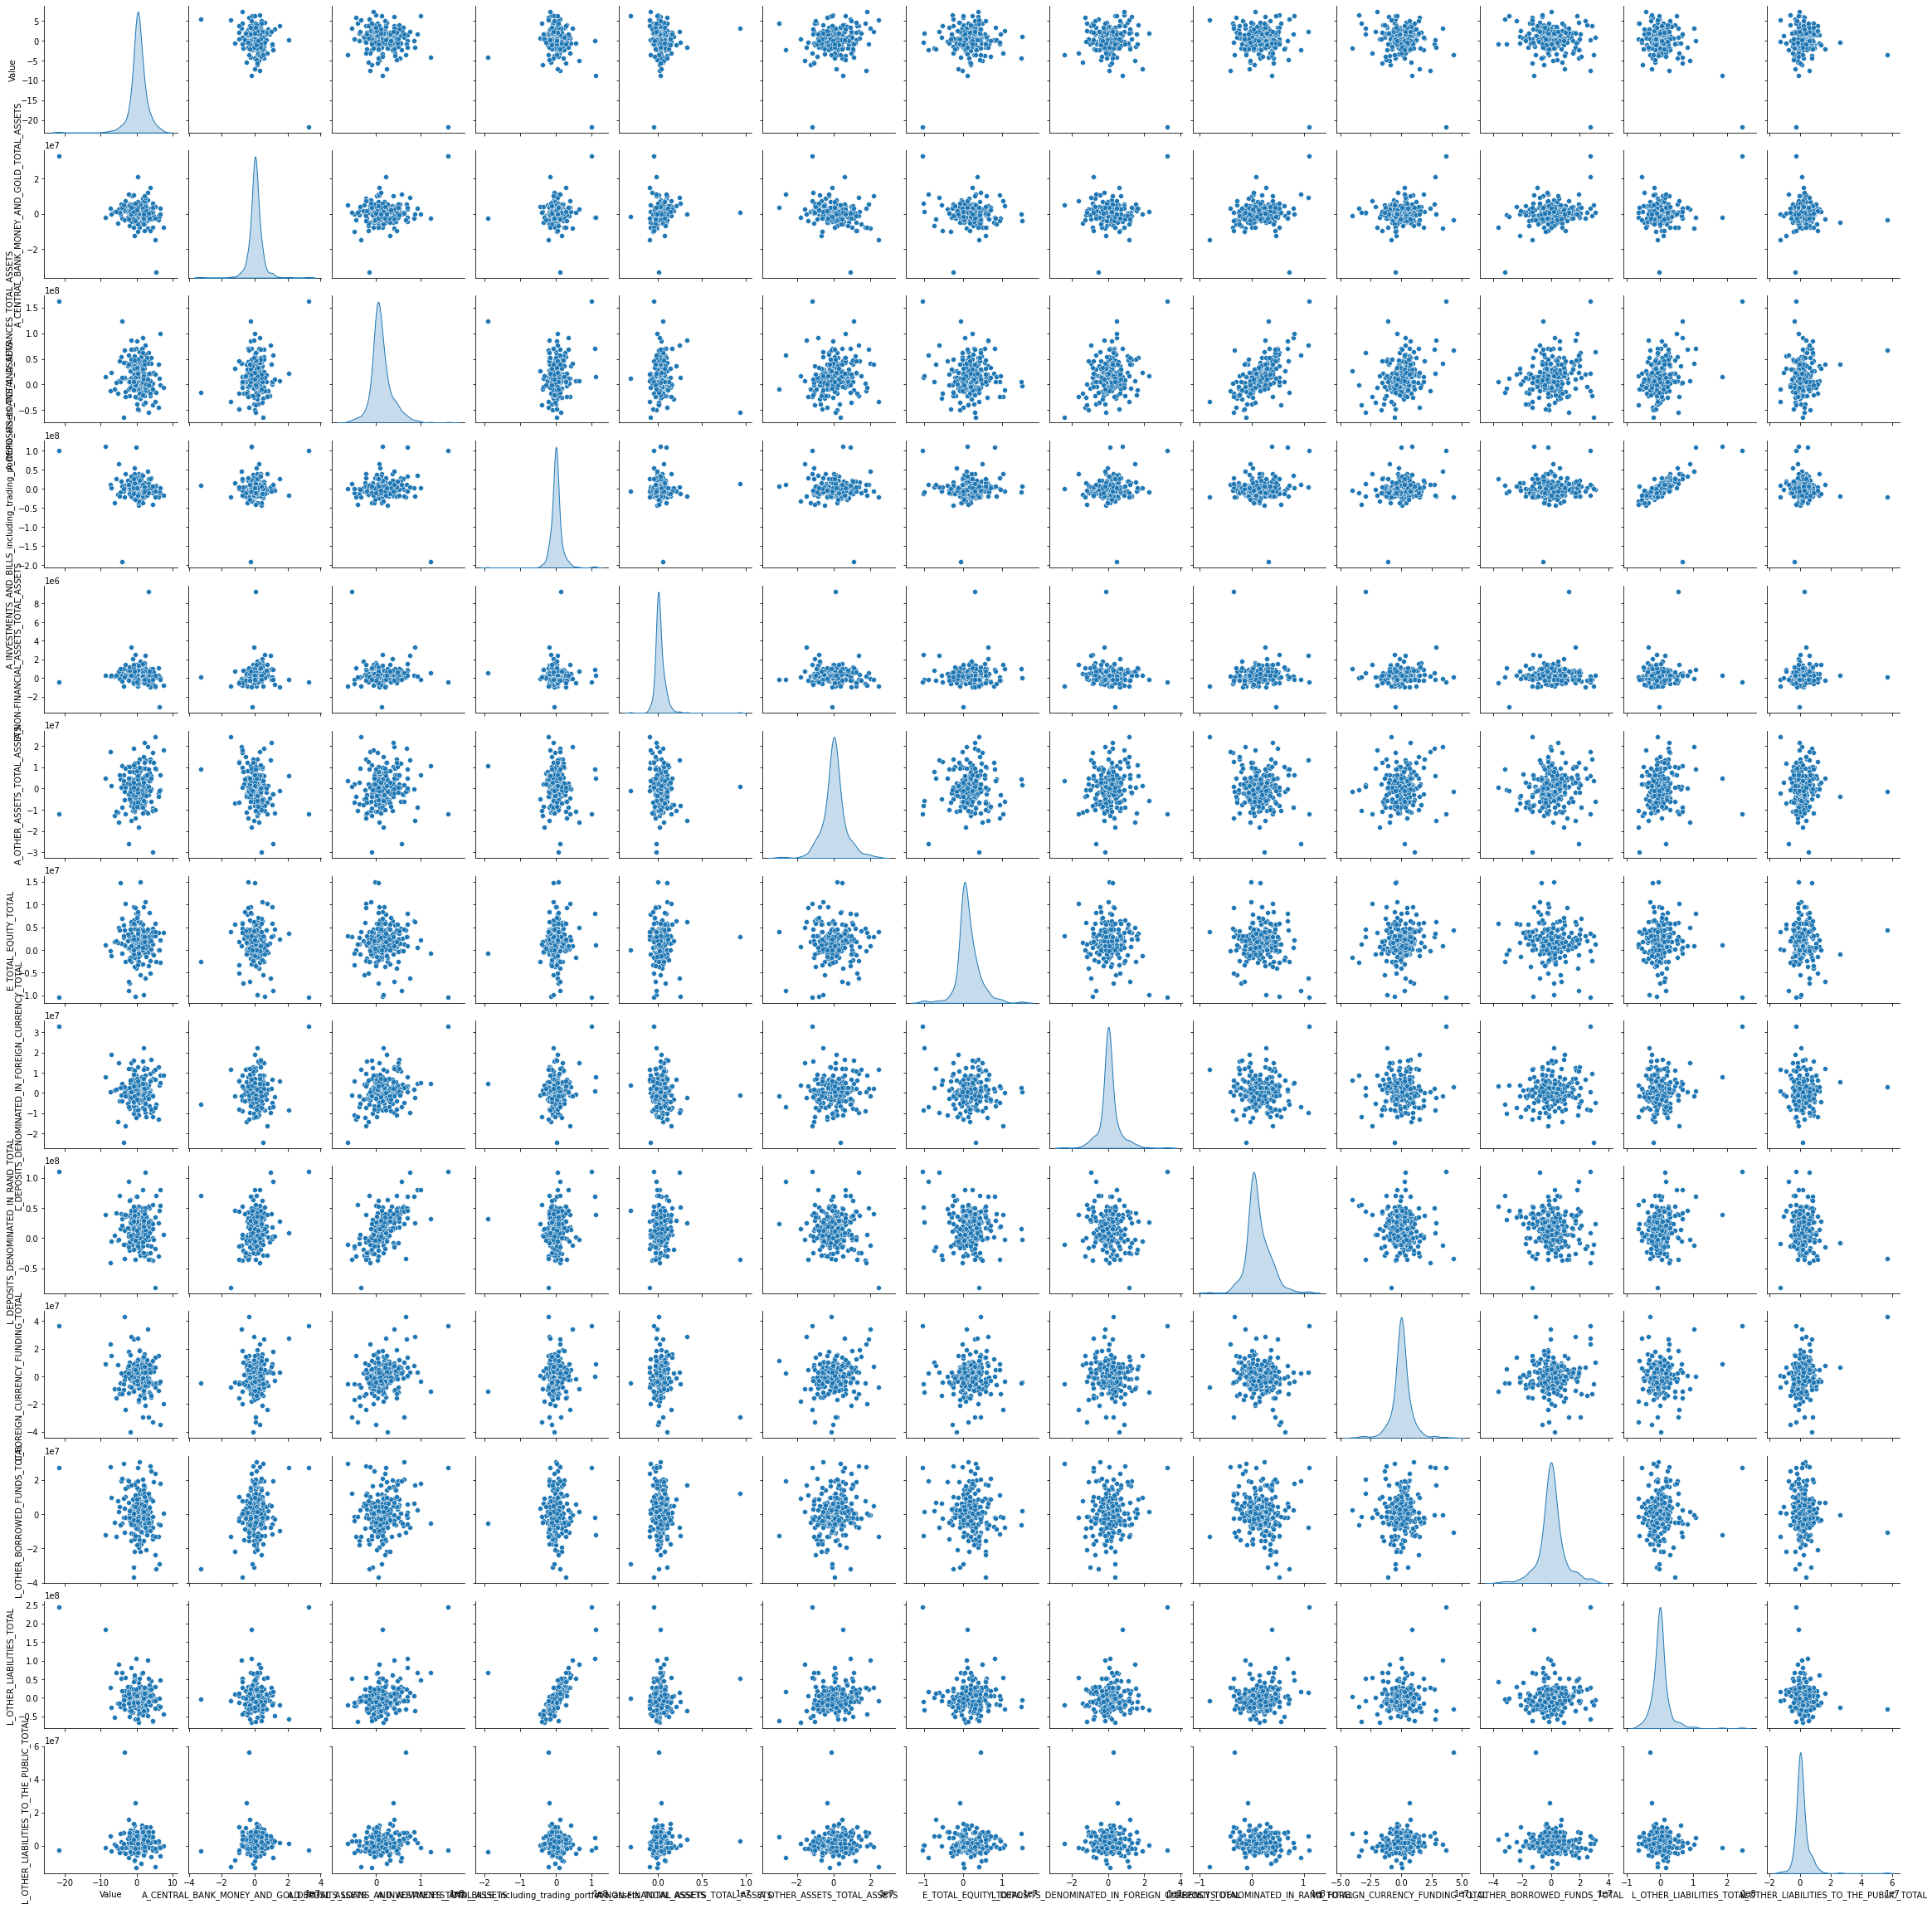

In [75]:
import seaborn as sns

sns.pairplot(shares.join(banks), diag_kind="kde")
plt.show()

In [76]:
def quarter_delay(banks_df, shares_df):
    banks_df = banks_df.shift(-3, "MS")
    joined_df = shares_df.join(banks_df, how="inner")
    shares_df = joined_df[["Value"]]
    banks_df = joined_df.iloc[:,1:]
    return(banks_df, shares_df)

In [77]:
def month_delay(banks_df, shares_df):
    banks_df = banks_df.shift(-1, "MS")
    joined_df = shares_df.join(banks_df, how="inner")
    shares_df = joined_df[["Value"]]
    banks_df = joined_df.iloc[:,1:]
    return(banks_df, shares_df)

In [78]:
qbanks, qshares = quarter_delay(banks, shares)

In [79]:
mbanks, mshares = month_delay(banks, shares)

In [80]:
def compare_corr():
    share_corr = shares.join(banks).corr()[["Value"]]
    mshare_corr = mshares.join(mbanks).corr()[["Value"]]
    qshare_corr = qshares.join(qbanks).corr()[["Value"]]
    plot_names = share_corr[share_corr["Value"]<0.10].index.to_list()
    corrSTD = share_corr.sort_values("Value", key=abs, ascending=False)
    corrM = mshare_corr.sort_values("Value", key=abs)
    corrQ = qshare_corr.sort_values("Value", key=abs)
    corrjoin1 = corrSTD.join(corrM, lsuffix="_STD", rsuffix="_M")
    corrjoin1 = corrjoin1.join(corrQ, rsuffix="_Q")
    corrjoin1["M > Q"] = abs(corrjoin1["Value_M"]) > abs(corrjoin1["Value"])
    corrjoin1.loc["Total"] = corrjoin1.sum()
    return(corrjoin1)

compare_corr()

,Value_STD,Value_M,Value,M > Q
Value,1.000000,1.000000,1.000000,False
L_OTHER_LIABILITIES_TOTAL,-0.366697,-0.162764,-0.093664,True
A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,-0.300625,0.267213,-0.017780,True
L_FOREIGN_CURRENCY_FUNDING_TOTAL,-0.224657,-0.006258,0.029655,False
A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,-0.204616,0.029271,0.021923,True
A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,-0.201991,-0.088938,-0.118528,False
L_OTHER_BORROWED_FUNDS_TOTAL,-0.170269,0.148842,0.161640,False
A_OTHER_ASSETS_TOTAL_ASSETS,0.155158,-0.000785,0.078833,False
L_DEPOSITS_DENOMINATED_IN_FOREIGN_CURRENCY_TOTAL,-0.119003,-0.079976,0.032351,True
L_DEPOSITS_DENOMINATED_IN_RAND_TOTAL,-0.114247,0.020994,-0.091561,False


# Model

Base on the scikit-learn estimator roadmap shown below, the ideal

estimator to start with will be the `Ridge` regression estimator

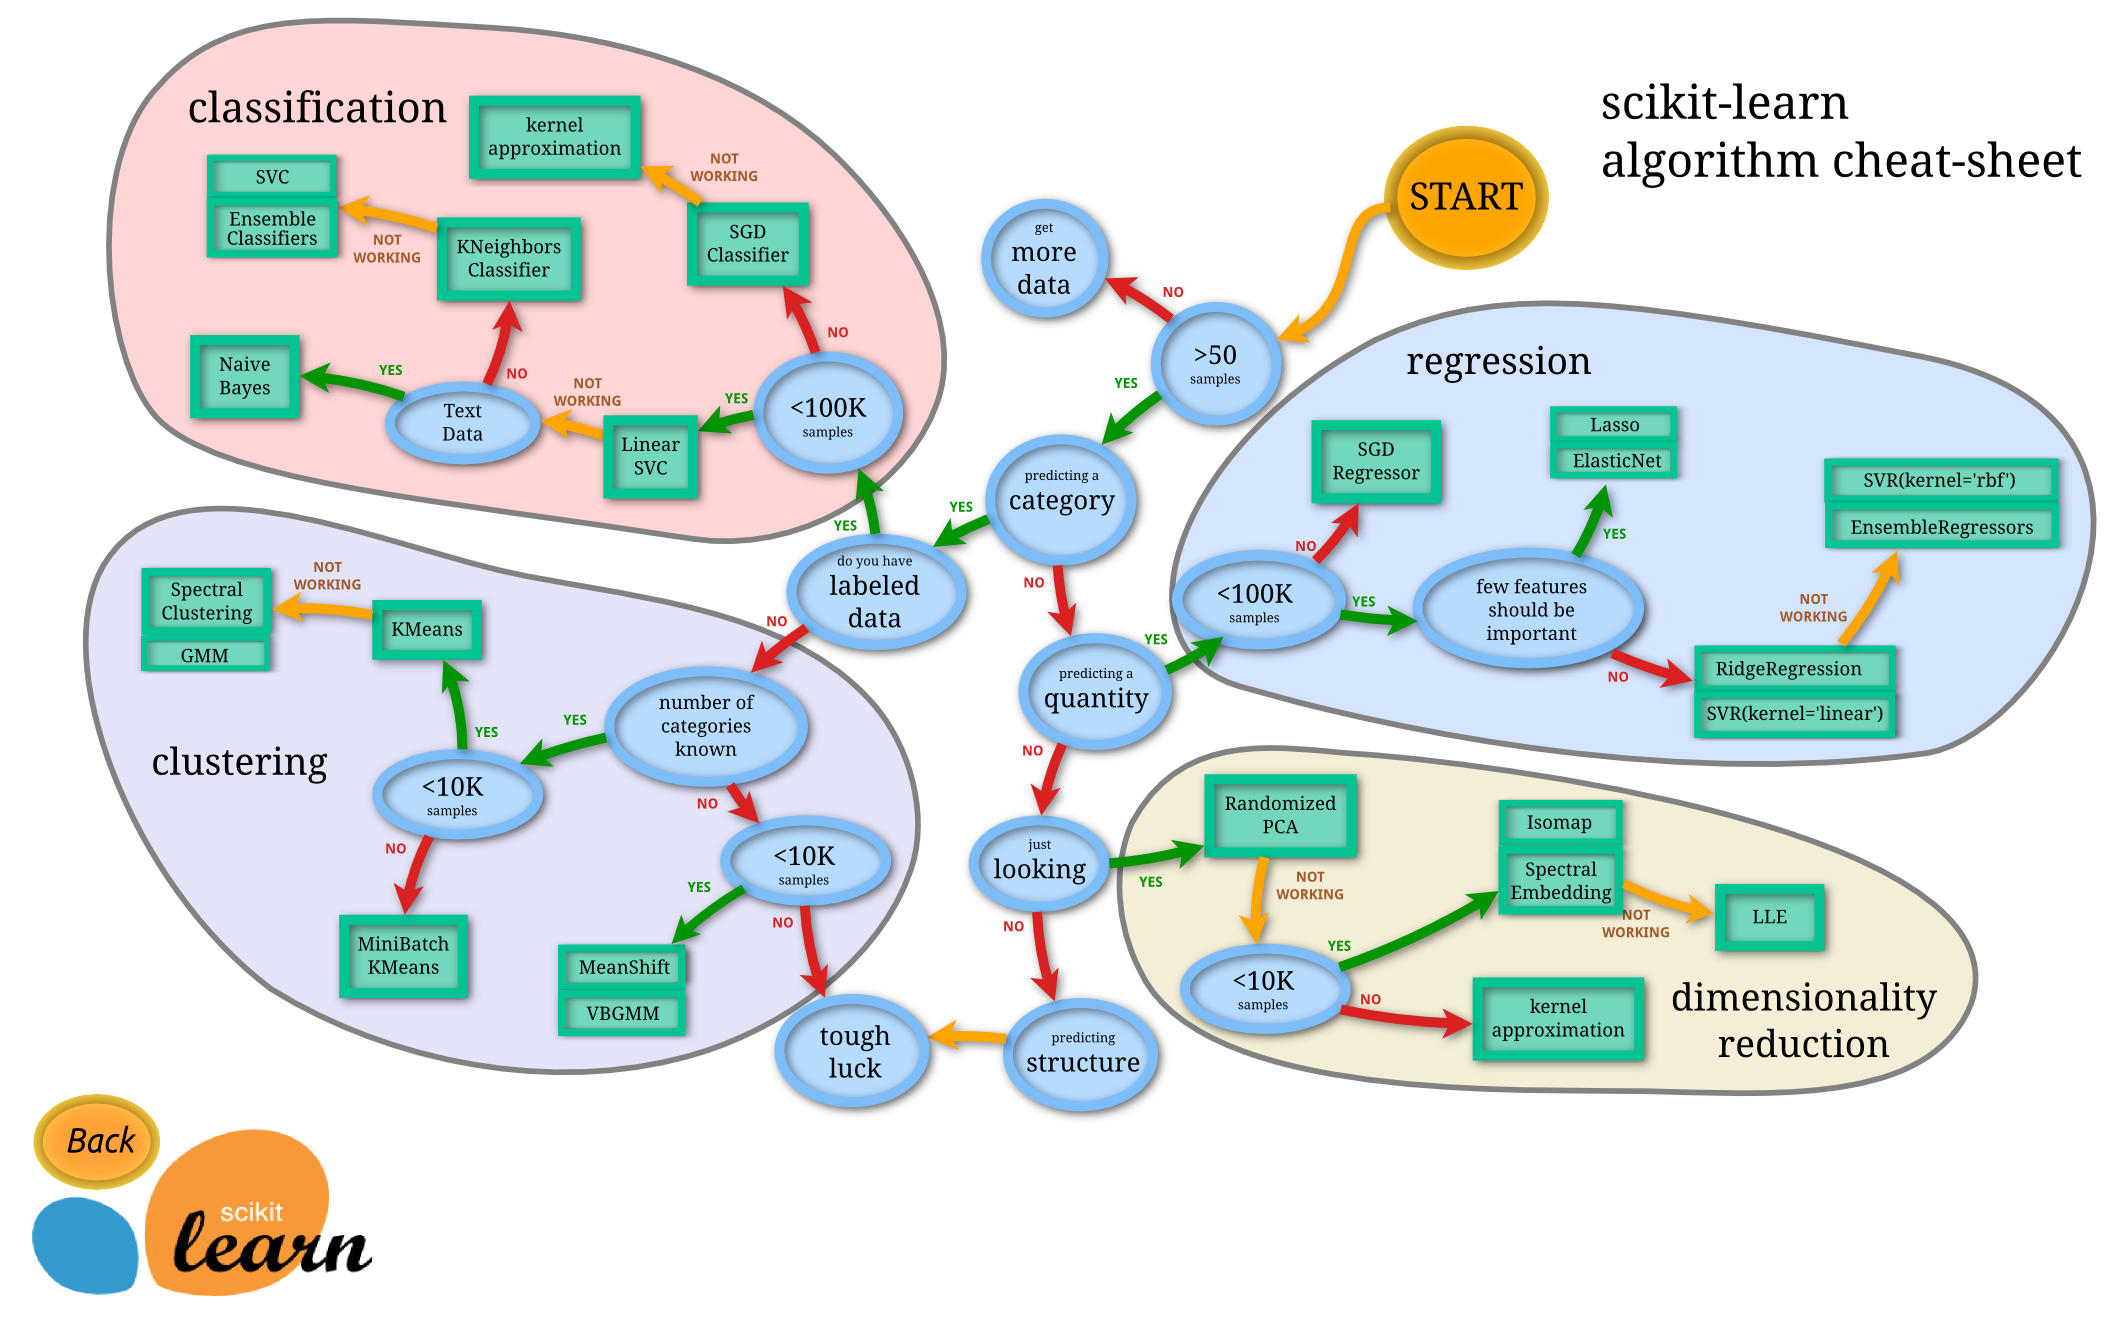

In [81]:
url='https://scikit-learn.org/stable/_static/ml_map.png'
Image(url, width=700, height=700)

## Base Model - LASSO Regression

In [82]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import TimeSeriesSplit

X = np.array(banks)
y = np.array(shares["Value"])

scaler = Normalizer()
X = scaler.fit_transform(X)

tss = TimeSeriesSplit()

ridge = Ridge()
ridge.fit(X, y)

Ridge()

In [83]:
def coeff_exaplained(df, coeff):
    features_coeff = pd.DataFrame(columns=["Feature_Coeff"])
    features = df.columns.to_list()
    j = 0
    for i in coeff:
        #print(f"{features[j]}: {i}")
        features_coeff.loc[f"{features[j]}"] = [i]
        j+=1
    features_coeff.sort_values("Feature_Coeff", ascending=False, inplace=True, key=abs)
    return(features_coeff)

In [84]:
coeff_exaplained(banks, ridge.coef_)

,Feature_Coeff
L_FOREIGN_CURRENCY_FUNDING_TOTAL,-1.827367
A_OTHER_ASSETS_TOTAL_ASSETS,1.552313
L_OTHER_BORROWED_FUNDS_TOTAL,-1.266400
L_OTHER_LIABILITIES_TOTAL,-1.066132
L_OTHER_LIABILITIES_TO_THE_PUBLIC_TOTAL,-0.717617
A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,0.518765
A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,-0.518271
L_DEPOSITS_DENOMINATED_IN_RAND_TOTAL,-0.420953
A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,0.273966
A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,-0.174446


In [85]:
from sklearn.model_selection import cross_val_score
def scores(X, y, model):
    '''Returns a dataframe containing the MSE & 
       R-Squared metrics of the given model, based
       on Time Series Data.'''
    tss_cv = tss.split(X)
    r_2 = cross_val_score(model, X, y, cv=tss_cv, scoring="r2")
    tss_cv = tss.split(X)
    mse = -cross_val_score(model, X, y, cv=tss_cv, scoring="neg_mean_squared_error")
    df = pd.DataFrame({ "Mean Squared Error": mse,
                        "R-Squared": r_2})
    df.loc["Avg:"] = df.mean()
    return(df)

In [86]:
scores(X, y, ridge)

,Mean Squared Error,R-Squared
0,0.848074,0.018859
1,1.964489,-0.329888
2,5.703828,-0.032767
3,6.526641,-0.002001
4,19.535861,0.033194
Avg:,6.915779,-0.062521


## Alternative Model - Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
forest = RandomForestRegressor(oob_score=True)
forest.fit(X, y)

RandomForestRegressor(oob_score=True)

In [89]:
forest.feature_importances_

array([0.05984626, 0.08017426, 0.06340859, 0.06495621, 0.05294885,
       0.08120496, 0.12015906, 0.0641982 , 0.09889953, 0.07086676,
       0.19857139, 0.04476592])

In [90]:
def features_exaplained(df, imp):
    features_imp = pd.DataFrame(columns=["Feature_Importance"])
    features = df.columns.to_list()
    j = 0
    for i in imp:
        #print(f"{features[j]}: {i}")
        features_imp.loc[f"{features[j]}"] = [i]
        j+=1
    features_imp.sort_values("Feature_Importance", ascending=False, inplace=True)
    features_imp.loc["Total"] = features_imp.sum()
    features_imp.loc["(The Out of Bag Score Returns: )"] = [forest.oob_score_]
    return(features_imp)

In [91]:
features_exaplained(df=banks, imp=forest.feature_importances_)

,Feature_Importance
L_OTHER_LIABILITIES_TOTAL,0.198571
L_DEPOSITS_DENOMINATED_IN_FOREIGN_CURRENCY_TOTAL,0.120159
L_FOREIGN_CURRENCY_FUNDING_TOTAL,0.098900
E_TOTAL_EQUITY_TOTAL,0.081205
A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,0.080174
L_OTHER_BORROWED_FUNDS_TOTAL,0.070867
A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,0.064956
L_DEPOSITS_DENOMINATED_IN_RAND_TOTAL,0.064198
A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,0.063409
A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,0.059846


The feature importances displayed above illustrate the relative importance of

each of the features relative to each other. As the total column suggests, the

sum of all the feature importances is 1. To more critically analyse whether all

the features are in fact necessary in the model, an interative fitting method

is displayed below. 

In [92]:
scores(X, y, forest)

,Mean Squared Error,R-Squared
0,0.888627,-0.050829
1,1.721340,-0.176072
2,6.053595,-0.101952
3,6.837149,-0.062880
4,19.898954,0.012255
Avg:,7.079933,-0.075896


Below we apply an iterative method of cloning the original model characteristics

and retrain it multiple times by excluding each of the features in turn.

This gives a more direct picture of which variables decrease the performance of

the model instead of aiding performance.

In [93]:
from sklearn.base import clone 

def imp_df(column_names, importances):
    data = {
        'Feature': column_names,
        'Importance': importances,
    }
    df = pd.DataFrame(data) \
        .set_index('Feature') \
        .sort_values('Importance', ascending=False)

    return(df)

def feat_eval_iter(model, X, y, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    forest_clone = clone(model)
    # set random_state for comparability
    forest_clone.random_state = random_state
    # training and scoring the benchmark model
    forest_clone.fit(X, y)
    benchmark_score = forest_clone.score(X, y)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X.columns:
        forest_clone = clone(model)
        forest_clone.random_state = random_state
        forest_clone.fit(X.drop(col, axis = 1), y)
        drop_col_score = forest_clone.score(X.drop(col, axis = 1), y)
        importances.append(benchmark_score - drop_col_score)

    importances_df = imp_df(X.columns, importances)
    
    
    
    return(importances_df)

In [94]:
df_imp = feat_eval_iter(forest, banks, y)

In [95]:
df_imp.to_csv("./data/feature_imp_select.csv")
df_imp

,Importance
Feature,
L_OTHER_LIABILITIES_TOTAL,0.010823
A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,0.004781
E_TOTAL_EQUITY_TOTAL,0.004743
A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,0.003751
A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,0.002659
L_FOREIGN_CURRENCY_FUNDING_TOTAL,0.001756
A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,0.001339
A_OTHER_ASSETS_TOTAL_ASSETS,0.001244
L_OTHER_LIABILITIES_TO_THE_PUBLIC_TOTAL,-0.000045


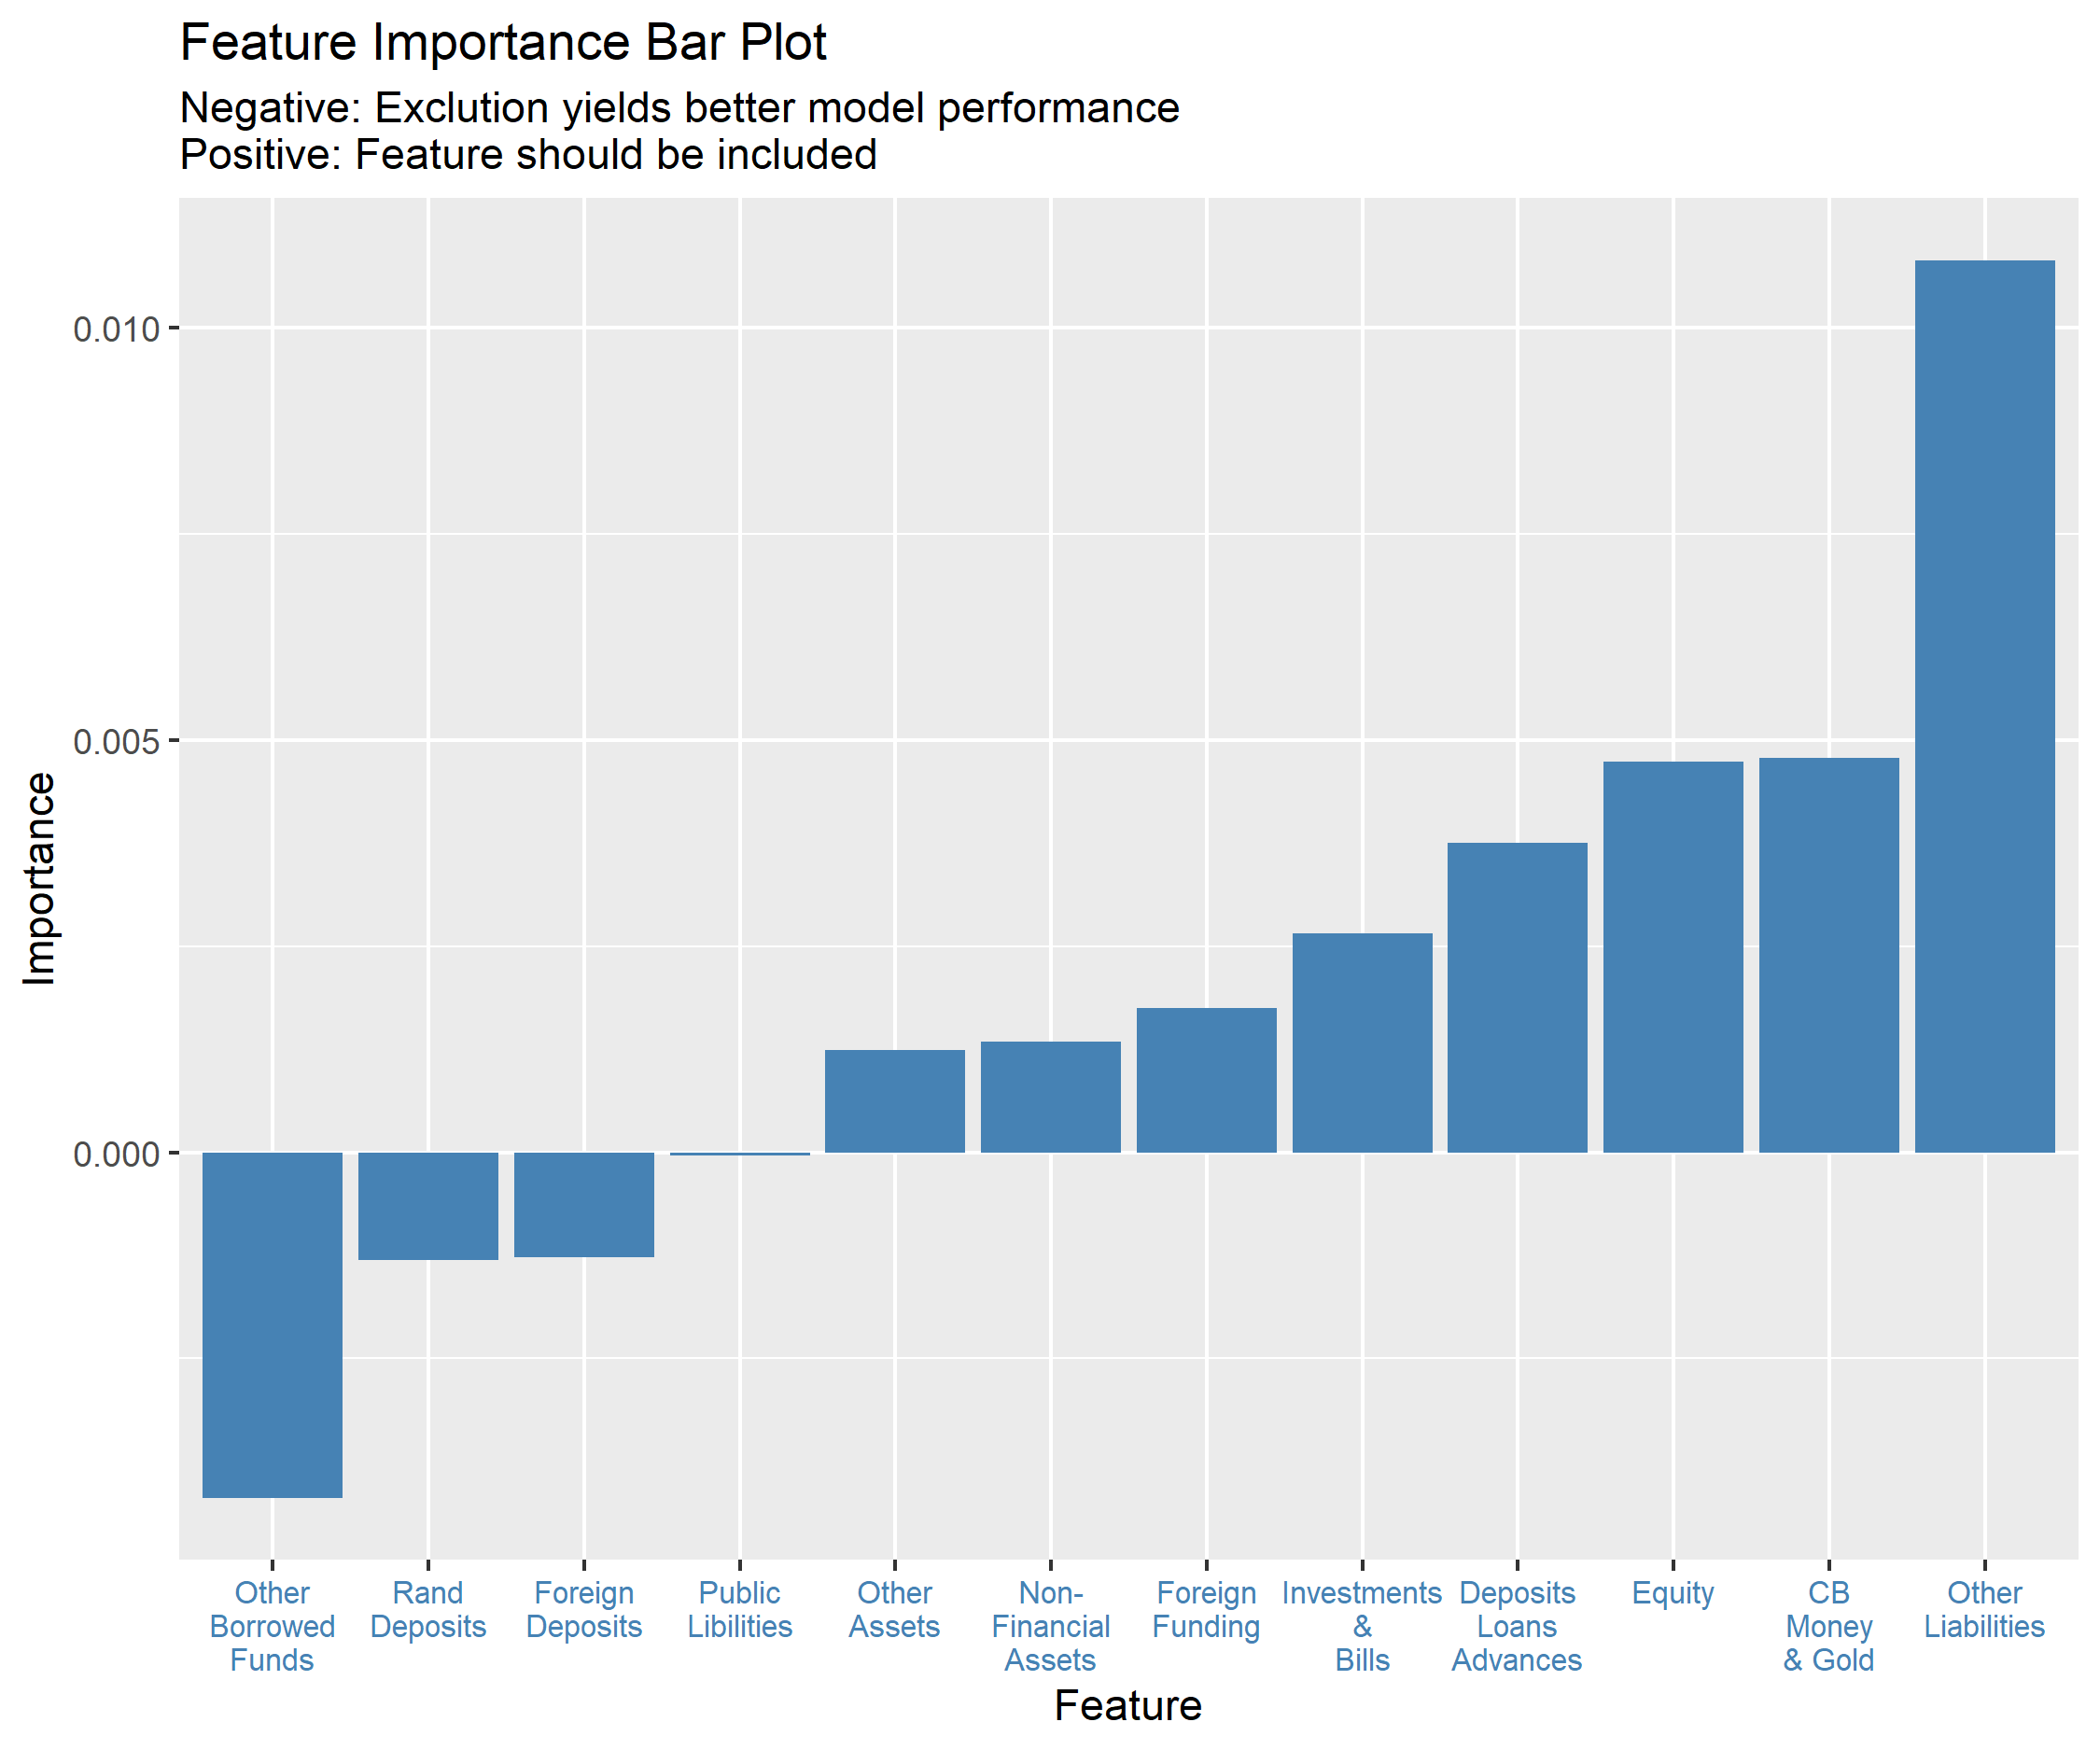

In [96]:
Image("./figures/Feature_imp_plot.png", width=700, height=700)

### Towards Improving the Model

Removing the features that decrease the model performance as the graph

above displays yields the following

In [97]:
def reduce_banks(df):
    df1 = df_imp[df_imp["Importance"]>0]
    df1 = df1.reset_index()
    df1 = df[df1["Feature"].to_list()]
    return(df1)

In [98]:
reduced_banks = reduce_banks(banks)

In [99]:
forest_reduced = RandomForestRegressor(oob_score=True)
X_reduced = np.array(reduce_banks(banks))
forest_reduced.fit(X_reduced, y)

RandomForestRegressor(oob_score=True)

In [100]:
features_exaplained(df=reduced_banks, imp=forest_reduced.feature_importances_)

,Feature_Importance
L_OTHER_LIABILITIES_TOTAL,0.175076
L_FOREIGN_CURRENCY_FUNDING_TOTAL,0.155034
A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,0.136907
A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,0.123522
E_TOTAL_EQUITY_TOTAL,0.119472
A_OTHER_ASSETS_TOTAL_ASSETS,0.110416
A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,0.093093
A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,0.086479
Total,1.000000
(The Out of Bag Score Returns: ),-0.157248


The feature importances displayed above illustrate the relative importance of

each of the features relative to each other. As the total column suggests, the

sum of all the feature importances is 1. To more critically analyse whether all

the features are in fact necessary in the model, an interative fitting method

is displayed below. 

In [101]:
scores(X_reduced, y, forest_reduced)

,Mean Squared Error,R-Squared
0,0.954470,-0.119340
1,2.089539,-0.407280
2,6.060686,-0.128165
3,6.786227,-0.057014
4,17.560501,0.122520
Avg:,6.690284,-0.117856


<p style='text-align: justify;'> 
Below we apply an iterative method of cloning the original model characteristics and retrain it multiple times by excluding each of the features in turn. This gives a more direct picture of which variables decrease the performance of the model instead of aiding performance.
</p>

## Month Shift

In [102]:
X_m = reduce_banks(mbanks)
y_m = np.array(mshares["Value"])

forest_m = RandomForestRegressor(oob_score=True)
forest_m.fit(X_m, y_m)

RandomForestRegressor(oob_score=True)

In [103]:
features_exaplained(df=X_m, imp=forest_m.feature_importances_)

,Feature_Importance
A_CENTRAL_BANK_MONEY_AND_GOLD_TOTAL_ASSETS,0.269460
A_NON-FINANCIAL_ASSETS_TOTAL_ASSETS,0.137883
E_TOTAL_EQUITY_TOTAL,0.121886
L_OTHER_LIABILITIES_TOTAL,0.113371
A_DEPOSITS_LOANS_AND_ADVANCES_TOTAL_ASSETS,0.102531
L_FOREIGN_CURRENCY_FUNDING_TOTAL,0.098938
A_OTHER_ASSETS_TOTAL_ASSETS,0.090666
A_INVESTMENTS_AND_BILLS_including_trading_portfolio_assets_TOTAL_ASSETS,0.065266
Total,1.000000
(The Out of Bag Score Returns: ),-0.157248


In [104]:
scores(X_m, y_m, forest_m)

,Mean Squared Error,R-Squared
0,0.908224,0.004505
1,1.511875,-0.191778
2,5.510136,0.024081
3,7.415195,-0.158952
4,22.066023,-0.055495
Avg:,7.482291,-0.075528


<p style='text-align: justify;'> 

A possible next step would be to consider a more aggregated dataset such as converting the monthly data to quarterly. However, a lot of information is lost during the process of removing overlapping columns. This is due to some total columns originating from more than one collection of individual columns summed together. i.e. a total column `A` can be obtained from summing together a set of individual columns `x1`, or a different set `x2`. By removing these individual columns, a lot of information is lost. A different model can be used to select individual columns more systematically, such that we are left with columns explaining more of the variance in the shares output variable. The anaylsis provided in this paper provides some insight regarding the most important features withing the balance sheet of the largest banks in South Africa. Using these as a part of a more comprehensive model for the movements in the share market for South Africa can provide more insight into whether they add to the explanatory power of such a model. 
    
</p>

<p style='text-align: justify;'> 
The results from each of the models up to now suggest that there is very little power in the balance sheets of the top 6 banks in SA for explaining movements in the stock market for South Africa. There seems to be some significant consistency across the models that `Other Liabilities` tends to be the most siginficant relationship with south african share prices. Additionally, the `Central Bank Money & Gold` is also regarded in the same light, however, not in as many of the models. These two variables are also the variables with the highest correlation with share prices in South Africa.
    </p>

# References